In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Read smpls list

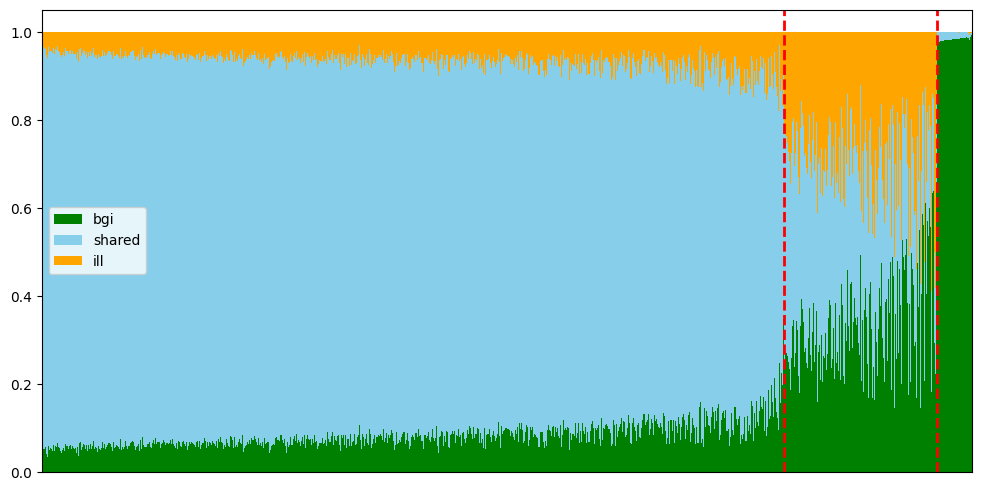

In [6]:
# Kingas plot
kg = pd.read_csv('input/BGI_Illumina_calls_comparison_table.txt', sep='\t')

# plot
kgp = kg.drop(columns=['sample_no'])
# create stacked bar chart for monthly temperatures
kgp.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=1916, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1587, color='red', linestyle='--', linewidth=2)

plt.savefig('results/kinga_plot.png')

# Bad & Worse sample groups

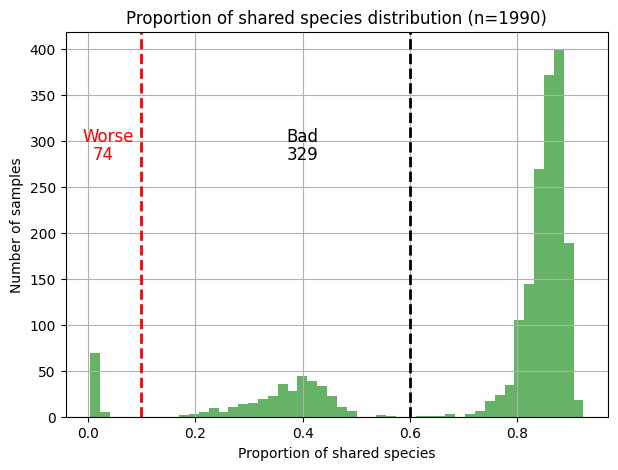

In [76]:
kg['shared'].hist(bins=50, figsize=(7,5), alpha=0.6, color='green')
plt.title('Proportion of shared species distribution (n=1990)')
plt.xlabel('Proportion of shared species')
plt.ylabel('Number of samples')

plt.axvline(x=0.1, color='red', linestyle='--', linewidth=2)
plt.axvline(x=0.6, color='black', linestyle='--', linewidth=2)

plt.text(-0.01, 300, 'Worse', fontsize=12, color='red')
plt.text(0.37, 300, 'Bad', fontsize=12, color='black')
plt.text(0.01, 280, '74', fontsize=12, color='red')
plt.text(0.37, 280, '329', fontsize=12, color='black')


plt.savefig('results/shared_species_distribution.png')

In [9]:
# select samples for "WORSE" group
wrs = kg[kg['bgi']>0.9]
print('Number of worse samples:',len(wrs))

# select samples for "BAD" group
bad = kg[(kg['shared'] < 0.6)&(kg['shared'] > 0.1)]
print('Number of bad samples:',len(bad))

# select samples for "GOOD" group
good = kg[kg['shared'] > 0.6]
print('Number of good samples:',len(good))

Number of worse samples: 74
Number of bad samples: 329
Number of good samples: 1587


In [10]:
wrs['sample'].to_csv('results/samples_Wrs.csv', index=False)
bad['sample'].to_csv('results/samples_Bad.csv', index=False)
good['sample'].to_csv('results/samples_Good.csv', index=False)